In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [0]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
X = dataset.iloc[:,3:13].values

In [0]:
X.shape

(10000, 10)

In [0]:
y = dataset.iloc[:,-1].values

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [0]:
labelEncoderCountry = LabelEncoder()

In [0]:
X[:,1] = labelEncoderCountry.fit_transform(X[:,1])

In [0]:
labelEncoderGender = LabelEncoder()

In [0]:
X[:,2] = labelEncoderGender.fit_transform(X[:,2])

In [0]:
oneHotEncoder = OneHotEncoder(categorical_features=[1])

In [0]:
X = oneHotEncoder.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X.shape

(10000, 12)

In [0]:
X = X[:,1:]

In [0]:
X.shape

(10000, 11)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
def model():
  model = Sequential()
  model.add(Dense(output_dim=6,input_dim=11,init="uniform",activation="relu"))
  model.add(Dense(output_dim=6,init="uniform",activation="relu"))
  model.add(Dense(output_dim=1,init="uniform",activation="sigmoid"))
  model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
  return model

In [0]:
classifier = model()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=11, activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


In [0]:
history = classifier.fit(X_train,y_train,epochs=50,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
8000/8000 [==============================] - 7s 835us/step - loss: 0.4985 - acc: 0.7950
Epoch 2/50
8000/8000 [==============================] - 4s 520us/step - loss: 0.4281 - acc: 0.7960
Epoch 3/50
8000/8000 [==============================] - 4s 544us/step - loss: 0.4214 - acc: 0.8037
Epoch 4/50
8000/8000 [==============================] - 4s 496us/step - loss: 0.4150 - acc: 0.8289
Epoch 5/50
8000/8000 [==============================] - 4s 493us/step - loss: 0.4105 - acc: 0.8300
Epoch 6/50
8000/8000 [==============================] - 4s 492us/step - loss: 0.4068 - acc: 0.8344
Epoch 7/50
8000/8000 [==============================] - 4s 493us/step - loss: 0.4048 - acc: 0.8355
Epoch 8/50
8000/8000 [==============================] - 4s 486us/step - loss: 0.4029 - acc: 0.8345
Epoch 9/50
8000/8000 [==============================] - 4s 486us/step - loss: 0.4014 - acc: 0.8369
Epoch 10/50
8000/8000 [==============================] - 4s 4

In [0]:
  y_prediction = classifier.predict(X_test)

In [0]:
y_prediction = (y_prediction>50)
y_prediction

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [0]:
import seaborn as sb

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test,y_prediction)

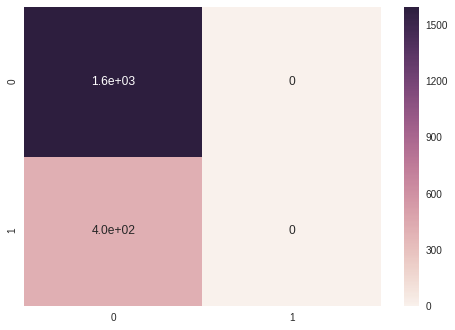

In [0]:
sb.heatmap(cm,annot=True)

In [0]:
cm

array([[1595,    0],
       [ 405,    0]])